In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import os

In [42]:
# file names for rats before and after injection
before_injection_control = []
before_injection_experiment = []
after_injection_control = []
after_injection_experiment = []

control_numbers = [1, 2, 3, 4, 5,]
experiment_numbers = [6, 7, 8, 9, 10]
before_dir = 'Samples/before_injection'
after_dir = 'Samples/after'



for filename in os.listdir(after_dir):
    if (filename.endswith('.txt') and 
        (filename.startswith(tuple(str(num) + '.' for num in control_numbers)) or 
         filename.startswith(tuple(str(num) + '_' for num in control_numbers)))):
        after_injection_control.append(filename)
    elif filename.endswith('.txt'):
          after_injection_experiment.append(filename)

for filename in os.listdir(before_dir):
    if (filename.endswith('.txt') and 
        (filename.startswith(tuple('(' + str(num) + ').' for num in control_numbers)) or 
         filename.startswith(tuple(str(num) + '_' for num in control_numbers)))):
        before_injection_control.append(filename)
    elif filename.endswith('.txt'):
          before_injection_experiment.append(filename)
            
before_injection_experiment

['(10).txt', '(6).txt', '(7).txt', '(8).txt', '(9).txt']

In [44]:
left_lower_all = []
left_upper_all = []
right_lower_all = []
right_upper_all = []

In [45]:
# func STEP returns a list of step legths
def step(step_list):
    steps = []
    for i, s in enumerate(step_list[:-1]):
        x1 = float(s[1:].split(', ')[0])              ##
        y1 = float(s[1:].split(', ')[1])               # get coordinates of current step
        x2 = float(step_list[i+1][1:].split(', ')[0])  # and the next one
        y2 = float(step_list[i+1][1:].split(', ')[1]) ##
        
        steps.append(math.hypot(abs(x1-x2), abs(y1-y2)))  # hypotenuse (=step length)
    return steps

before_injection_control
before_injection_experiment
after_injection_control
after_injection_experiment 

before_control
before_experiment
after_control
after_experiment 

In [63]:
for file in after_injection_experiment:  # analyse all the files from the list
    with open('Samples/after/'+file, 'r') as file_paws: 
        file_list = file_paws.read().strip().split('\n')

        left_lower = file_list[0][19:]  ## 
        left_upper = file_list[1][21:]   #  read DATA
        right_upper = file_list[2][22:]  #  from input
        right_lower = file_list[3][20:] ##

        left_lower = [s.strip() for s in left_lower[1:-2].split('),')]     ## 
        left_upper = [s.strip() for s in left_upper[1:-2].split('),')]      #  convert 
        right_upper = [s.strip() for s in right_upper[1:-2].split('),')]    #  to list
        right_lower = [s.strip() for s in right_lower[1:-2].split('),')]   ##

        # print(tuple(float(item) for item in left_lower[0][1:].split(', ')))   # создание нормальных кортежей если вдруг надо

        left_lower_all.extend(step(left_lower))    ##
        left_upper_all.extend(step(left_upper))     #  lists with
        right_lower_all.extend(step(right_lower))   #  lengths of steps
        right_upper_all.extend(step(right_upper))  ##

In [64]:
y_means = [np.mean(left_lower_all),
         np.mean(left_upper_all),
         np.mean(right_lower_all),
         np.mean(right_upper_all)]

y_errors = [np.std(left_lower_all),
         np.std(left_upper_all),
         np.std(right_lower_all),
         np.std(right_upper_all)]

In [65]:
with open('Samples/after_experiment.txt', 'w') as f:
    f.write(str(y_means)[1:-1])
    f.write('\n')
    f.write(str(y_errors)[1:-1])

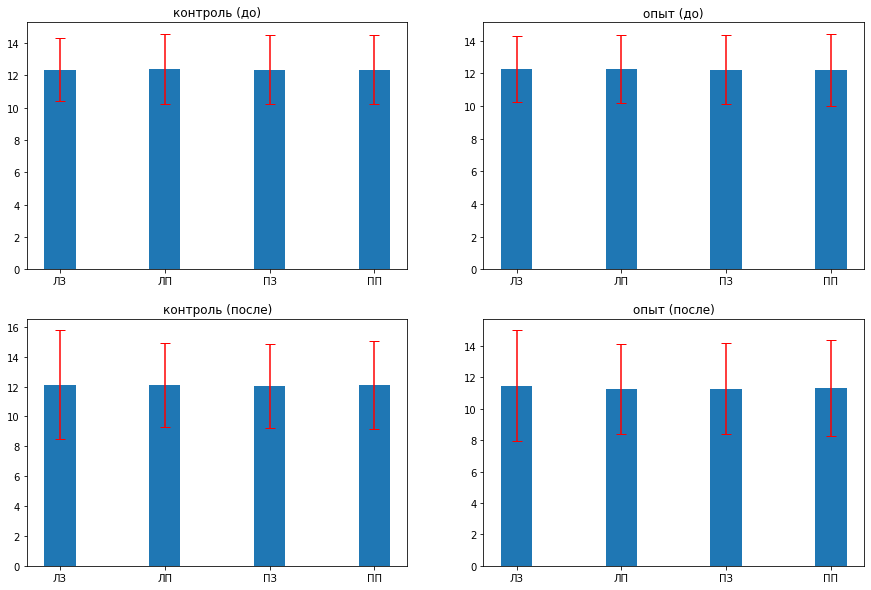

In [72]:
px_2_sm = lambda pxels: 0.081578328*pxels+ 0.16621237  # через LAMBDA и MAP конвертим списки в пикселях в САНТИМЕТРОВЫЕ
# px_2_sm = lambda pxels: pxels


with open('Samples/before_control.txt', 'r') as f:
    f_text = f.read().strip().split('\n')
    y_means_before_control = list(float(s) for s in f_text[0].split(', '))
    y_errors_before_control = list(float(s) for s in f_text[1].split(', '))

    y_means_before_control = list(map(px_2_sm, y_means_before_control))
    y_errors_before_control = list(map(px_2_sm, y_errors_before_control))

with open('Samples/before_experiment.txt', 'r') as f:
    f_text = f.read().strip().split('\n')
    y_means_before_experiment = list(float(s) for s in f_text[0].split(', '))
    y_errors_before_experiment = list(float(s) for s in f_text[1].split(', '))

    y_means_before_experiment = list(map(px_2_sm, y_means_before_experiment))
    y_errors_before_experiment = list(map(px_2_sm, y_errors_before_experiment))

with open('Samples/after_control.txt', 'r') as f:
    f_text = f.read().strip().split('\n')
    y_means_after_control = list(float(s) for s in f_text[0].split(', '))
    y_errors_after_control = list(float(s) for s in f_text[1].split(', '))

    y_means_after_control = list(map(px_2_sm, y_means_after_control))
    y_errors_after_control = list(map(px_2_sm, y_errors_after_control))

with open('Samples/after_experiment.txt', 'r') as f:
    f_text = f.read().strip().split('\n')
    y_means_after_experiment = list(float(s) for s in f_text[0].split(', '))
    y_errors_after_experiment = list(float(s) for s in f_text[1].split(', '))

    y_means_after_experiment = list(map(px_2_sm, y_means_after_experiment))
    y_errors_after_experiment = list(map(px_2_sm, y_errors_after_experiment))


# SANTIMETERS = 0.081578328 * PIXELS + 0.16621237



# x = np.arange(1,5)
x = ['ЛЗ', 'ЛП', 'ПЗ', 'ПП']

fig, axs = plt.subplots(2,2)

axs[0][0].bar(x, y_means_before_control,
           yerr = y_errors_before_control,
           capsize = 5,
           ecolor = 'red',
           width = 0.3)
axs[0][0].set_title('контроль (до)')

axs[0][1].bar(x, y_means_before_experiment,
           yerr = y_errors_before_experiment,
           capsize = 5,
           ecolor = 'red',
           width = 0.3)
axs[0][1].set_title('опыт (до)')

axs[1][0].bar(x, y_means_after_control,
           yerr = y_errors_after_control,
           capsize = 5,
           ecolor = 'red',
           width = 0.3)
axs[1][0].set_title('контроль (после)')

axs[1][1].bar(x, y_means_after_experiment,
           yerr = y_errors_after_experiment,
           capsize = 5,
           ecolor = 'red',
           width = 0.3)
axs[1][1].set_title('опыт (после)')


fig.set_size_inches(15, 10)
plt.show()